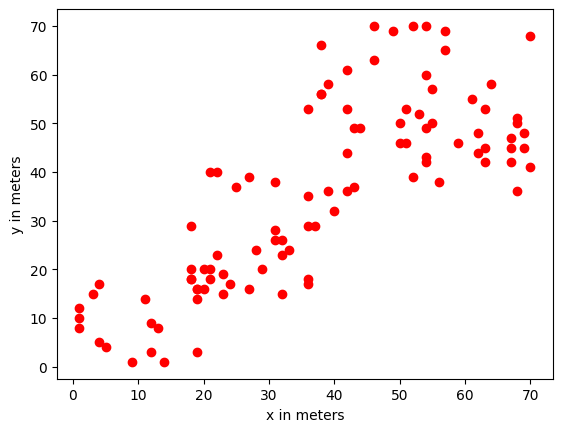

In [2]:
# for genrating graph and points
import numpy as np
import random
import matplotlib.pyplot as plt

plt.xlabel("x in meters")
plt.ylabel("y in meters")

# genrating random points
import random

# less number of points
x_gen1 = [random.randint(1, 20) for _ in range(20)]
y_gen1 = [random.randint(1, 20) for _ in range(20)]

# medium number of points
x_gen2 = [random.randint(15, 40) for _ in range(30)]
y_gen2 = [random.randint(15, 40) for _ in range(30)]

# more number of points 
x_gen3 = [random.randint(35, 70) for _ in range(50)]
y_gen3 = [random.randint(35, 70) for _ in range(50)]

# Combine all sections

x_gen = x_gen1 + x_gen2 + x_gen3
y_gen = y_gen1 + y_gen2 + y_gen3



plt.scatter(x_gen, y_gen, color ="red")  # just for now 
plt.show()


no of points 36


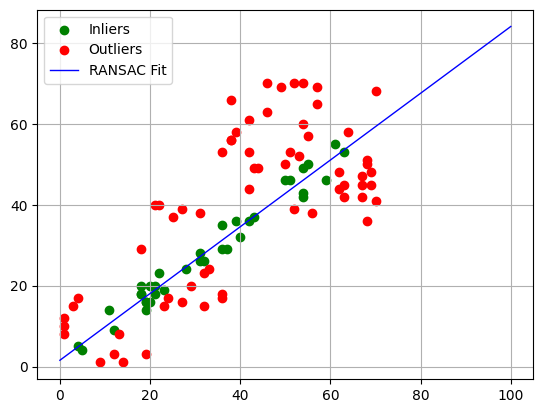

In [3]:
# for fitting line
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
 residual_threshold=None,  # threshold
 max_trials=1000,       # test for 1000 times
 min_samples=50,        # Needs at least 30 points to fit
 stop_n_inliers=70,     # Stop early if 50 inliers are found
 stop_score=0.98,       # Stop if R² score reaches 0.98
 loss="squared_error", # Use squared loss instead of absolute loss
 random_state = 1
)
y_gen = np.array(y_gen)
X_2d = np.array(x_gen).reshape(-1, 1)
ransac.fit(X_2d, y_gen) 

inlier_mask = ransac.inlier_mask_  
outlier_mask = ~inlier_mask 

line_X = np.linspace(0, 100, 100).reshape(-1, 1)  # Create X values for line
line_y = ransac.predict(line_X)


# gree(inliers)
plt.scatter(X_2d[inlier_mask], y_gen[inlier_mask],color="green", label="Inliers")

# red(outliers)
plt.scatter(X_2d[outlier_mask], y_gen[outlier_mask],color="red", label="Outliers")

# best fit  
plt.plot(line_X, line_y, color="blue", linewidth=1, label="RANSAC Fit")
print("no of points", len(X_2d[inlier_mask]))
plt.legend()
plt.grid(True)

plt.show()

